In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [33]:
print(diabetes['DESCR'])
print(diabetes['target'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [34]:
#independent feature
X=pd.DataFrame(diabetes['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [35]:
#dependent
y=diabetes['target']
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=10)
 # applying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()

In [39]:
regressor.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.46556392401755853, 0.9838709677419355, 'x[8] <= -0.009\ngini = 0.993\nsamples = 309\nvalue = [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0\n3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 2.0\n2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 4.0, 4.0, 1.0, 2.0\n1.0, 3.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0\n1.0, 5.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 1.0, 1.0\n1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 3.0\n2.0, 2.0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0\n1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0\n2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0\n1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0\n1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0\n1.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0\n1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 4.0, 1.0, 1.0\n1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0\n1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0\n1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0\n2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0\n1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0

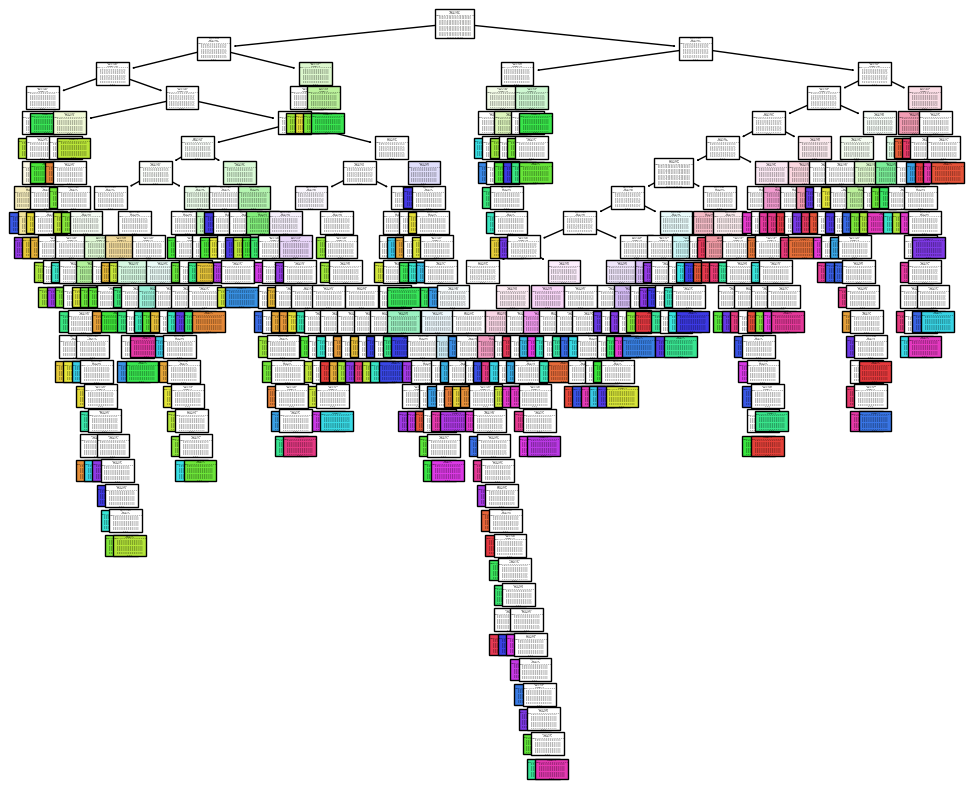

In [13]:
# visualize the decision tree
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(treeclasifier,filled=True)

### hyper parameter tuning

In [40]:
# Define your corrected parameter grid
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}


In [41]:
from sklearn.model_selection import GridSearchCV
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')


In [42]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [44]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [45]:
y_pred=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2967040006663101
55.15649673225216
4450.225766234597


In [46]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')
selectedmodel.fit(X_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[6] <= 0.033\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[2] <= -0.015\nfriedman_mse = 5771.495\nsamples = 241\nvalue = 166.49'),
 Text(0.125, 0.5, 'x[4] <= 0.001\nfriedman_mse = 3117.026\nsamples = 83\nvalue = 120.639'),
 Text(0.0625, 0.3, 'x[4] <= -0.052\nfriedman_mse = 2757.524\nsamples = 57\nvalue = 109.193'),
 Text(0.03125, 0.1, 'friedman_mse = 3728.247\nsamples = 18\nvalue = 122.444'),
 Text(0.09375, 0.1, 'friedman_mse = 2191.045\nsamples = 39\nvalue = 103.077'),
 Text(0.1875, 0.3, 'x[9] <= 0.109\nfriedman_mse = 2988.351\nsamples = 26\nvalue = 145.731'),
 Text(0.15625, 0.1, 'friedman_mse = 2346.698\nsamples = 25\nvalue = 140.32'),
 Text(0.21875, 0.1, 'friedman_mse = 0.0\nsamples = 1\nvalue = 281.0'),
 Text(0.375, 0.5, 'x[7] <= -0.005\nfriedman_mse = 5481.396\nsamples = 158\nvalue = 190.576'),
 Text(0.3125, 0.3, 'x[2] <= 0.109\nfriedman_mse = 4376.688\nsamples = 26\nvalue = 133.346'),
 Text(0.28125, 0.1, 'friedman_mse = 3894.938

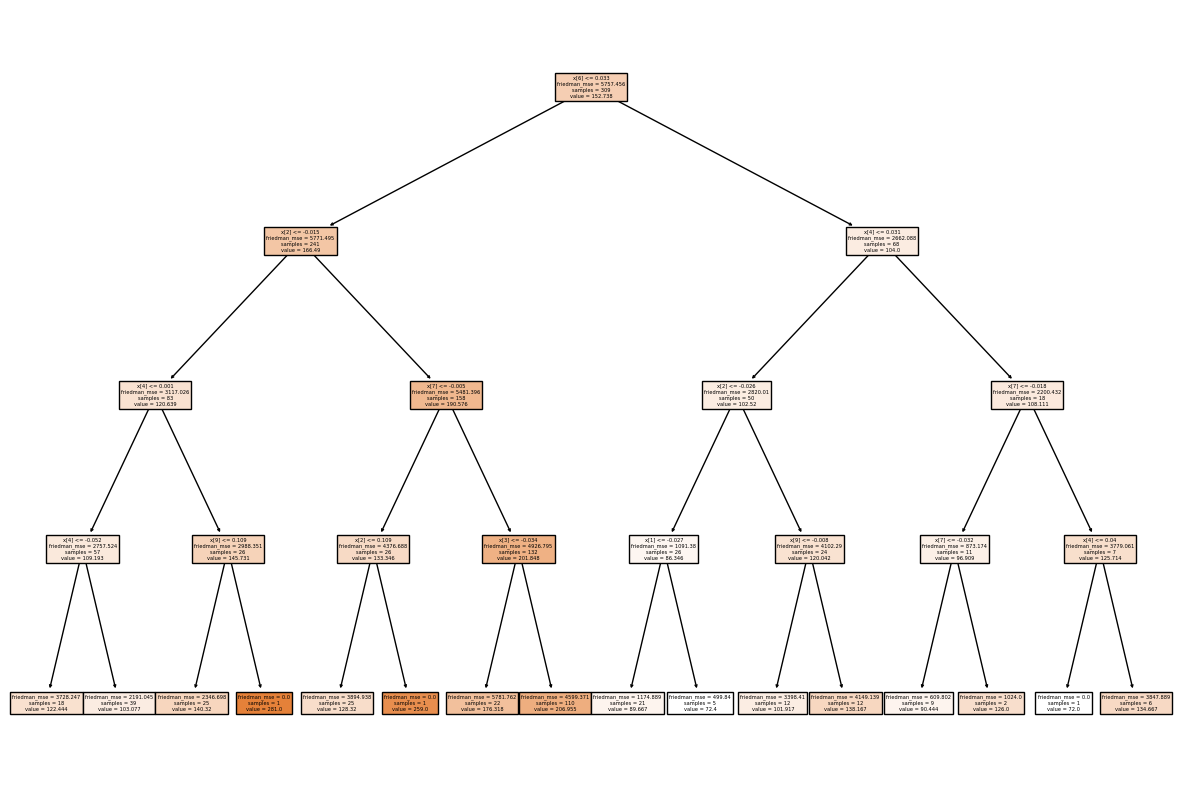

In [47]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)